<a href="https://colab.research.google.com/github/Vaishnavi943/zomato_data_analysis/blob/main/chapter_appendix-zomato-data-analysis-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zomato Analysis **Project**

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
# loading the data
zomato = pd.read_csv("Zomato data .csv")

In [5]:
zomato

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [8]:
# data cleaning
# rating (convert the data type of col "rating")
def handleRate(val):
  val = str(val).split("/")
  val = val[0];
  return float(val)

zomato['rate'] = zomato['rate'].apply(handleRate)
zomato.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [9]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


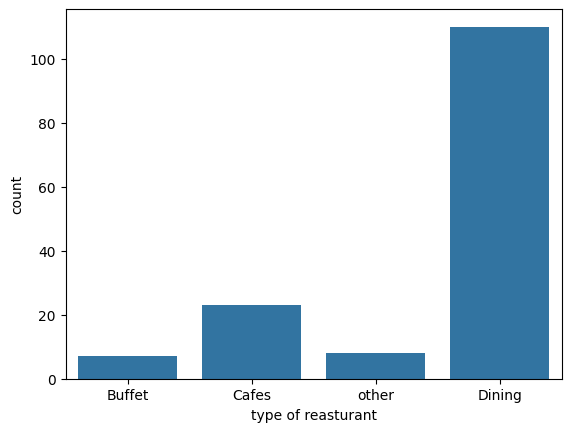

In [21]:
# Q1. what types of reasturant do the majority of customers order from?
# type of reasturant
sns.countplot(x=zomato['listed_in(type)'])
plt.xlabel('type of reasturant')
plt.show()

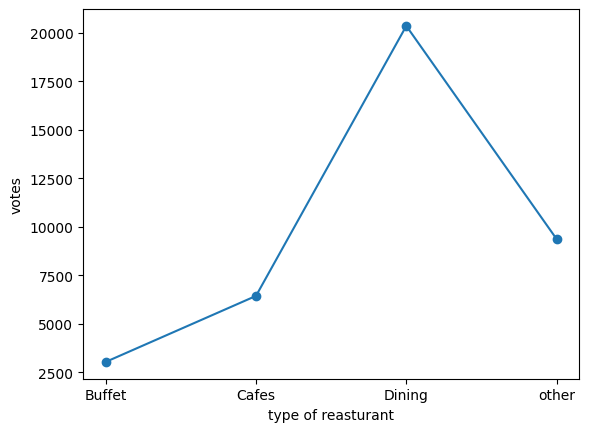

In [29]:
# Q2. how many votes has each type of reasturant received from customers?
grouped_data = zomato.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, marker='o')
plt.xlabel('type of reasturant')
plt.ylabel('votes')
plt.show()

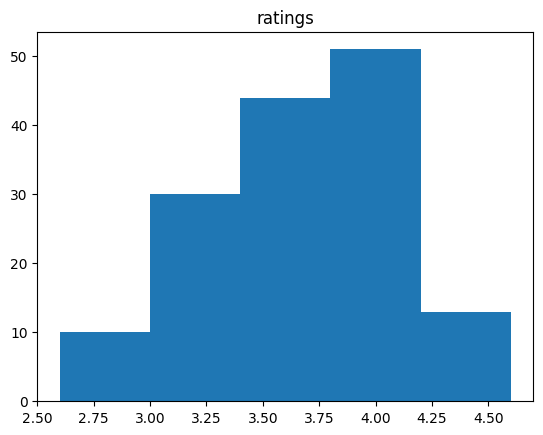

In [33]:
# Q3. what are the ratings that the majority of reasturant have received?
plt.hist(zomato['rate'], bins=5)
plt.title("ratings")
plt.show()

<ipython-input-35-992c87f4e5e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=coupled_data, palette='Paired')


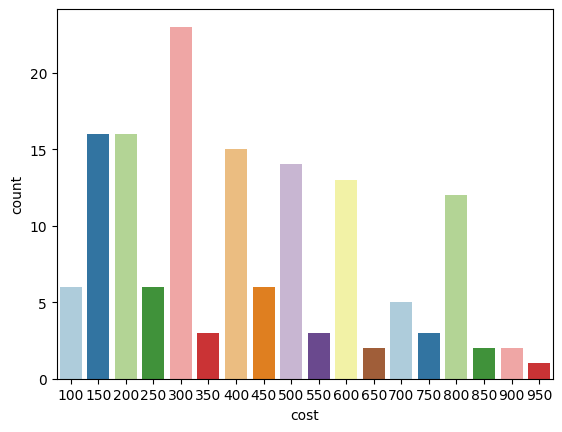

In [35]:
# Q4. zomato has observed that most couple order most of their food online. what are their avaerage spending on each?
coupled_data = zomato['approx_cost(for two people)']
sns.countplot(x=coupled_data, palette='Paired')
plt.xlabel('cost')
plt.show()

<ipython-input-10-0f8ca7970b8b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='online_order', y='rate', data=zomato,  palette='Paired')


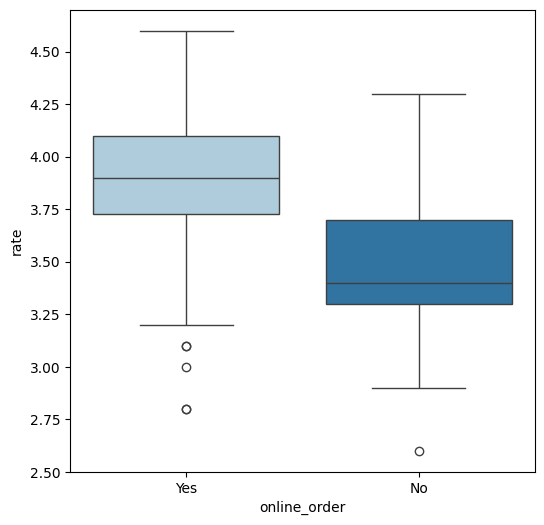

In [10]:
# Q5. which mode(online/offline) has received the maximum ratings?
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=zomato,  palette='Paired')
plt.show()

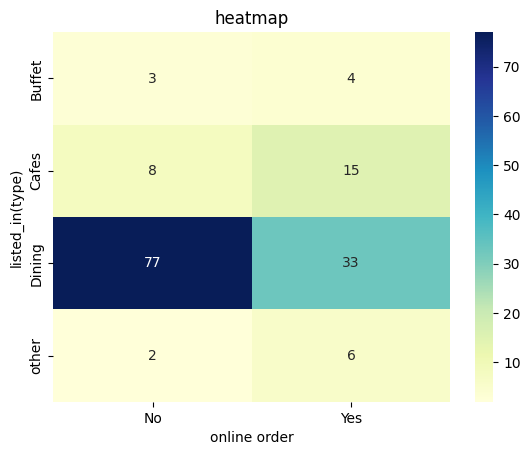

In [13]:
# Q6. which type of reasturant received more offline order, so that zomato can  offer  customers with some good offers?
pivot_table = zomato.pivot_table(index='listed_in(type)',columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('heatmap')
plt.xlabel("online order")
plt.ylabel("listed_in(type)")
plt.show()